In [87]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as patches
import numpy as np
import scipy
from scipy.optimize import curve_fit
import cv2
from PIL import Image
import glob

import images_library

In [88]:
#WITH FILTER  @457 nm

setUp = "PMMA centered 457nm"
#setUp = "PMMA moved 457nm"

if setUp== "PMMA centered 457nm":
    inputFile = "20221102_Flash/2022_11_04_flash_1mm/spettro/f8/e9MeV_12Gy_457nm_1.TIF"
    title = "PMMAcentered_457nm"
    cenX, cenY= 323, 235
    darkPath="20221102_Flash/2022_11_04_flash_1mm/spettro/f8/*buio*.TIF"
    dataPath = "20221102_Flash/2022_11_04_flash_1mm/spettro/f8/*.TIF" 
    darkWord = "buio_457"
    dataWord = "457"

if setUp== "PMMA moved 457nm":
    inputFile = "20221102_Flash/2022_11_04_flash_1mm/cerenkov/cerenkov_457_1.TIF"
    title = "PMMAmoved_457nm"
    cenX, cenY= 322, 236
    darkPath="20221102_Flash/2022_11_04_flash_1mm/cerenkov/*buio*.TIF"
    dataPath="20221102_Flash/2022_11_04_flash_1mm/cerenkov/cerenkov*.TIF"
    dataWord = "457"
    darkWord = "buio_457"


In [89]:
#WITHOUT FILTER 

#setUp = "PMMA centered"
#setUp = "PMMA moved"
#setUp = "Without scintillator"
#setUp = "Without scintillator-without PMMA"

if setUp== "PMMA centered":
    inputFile = "20221102_Flash/2022_11_04_flash_1mm/spettro/f8/e9MeV_12Gy_open_1.TIF"
    title = "PMMAcentered"
    cenX, cenY= 322, 236
    darkPath="20221102_Flash/2022_11_04_flash_1mm/spettro/f8/*buio*.TIF"
    dataPath = "20221102_Flash/2022_11_04_flash_1mm/spettro/f8/*.TIF" 
    darkWord = "buio_open"#"buio_457"
    dataWord = "open"#"457"

if setUp== "PMMA moved":
    inputFile = "20221102_Flash/2022_11_04_flash_1mm/cerenkov/cerenkov_open_1.TIF"
    title = "PMMAmoved"
    cenX, cenY= 322, 235
    darkPath="20221102_Flash/2022_11_04_flash_1mm/cerenkov/*buio*.TIF"
    dataPath="20221102_Flash/2022_11_04_flash_1mm/cerenkov/cerenkov*.TIF"
    dataWord = "open"#"457"
    darkWord = "buio_1"#"buio_457"

if setUp== "Without scintillator":
    inputFile = "20221102_Flash/2022_11_04_flash_1mm/cerenkov_fibra/fibra_12Gy_1.TIF"
    title = "WithoutScintillator"
    cenX, cenY= 260, 225
    darkPath="20221102_Flash/2022_11_04_flash_1mm/cerenkov_fibra/*buio*.TIF" 
    dataPath="20221102_Flash/2022_11_04_flash_1mm/cerenkov_fibra/*.TIF"
    dataWord= "fibra_12Gy"
    darkWord = "buio_1"

if setUp== "Without scintillator-without PMMA":
    inputFile = "20221102_Flash/2022_11_04_flash_1mm/cerenkov_fibra/fibra_noPMMA_12Gy_1.TIF"
    title = "WithoutScintillator-WithoutPMMA"
    cenX, cenY= 260, 225
    darkPath="20221102_Flash/2022_11_04_flash_1mm/cerenkov_fibra/*buio*.TIF" 
    dataPath="20221102_Flash/2022_11_04_flash_1mm/cerenkov_fibra/*.TIF"
    dataWord= "fibra_noPMMA_12Gy"
    darkWord = "buio_noPMMA_1"


PMMAcentered_457nm
Center: 323, 235


Added an image to the dictionary with key: buio_457
Added an image to the dictionary with key: 457nm_3
Added an image to the dictionary with key: 457nm_2
Added an image to the dictionary with key: 457nm_1
Dark and data dict filled!


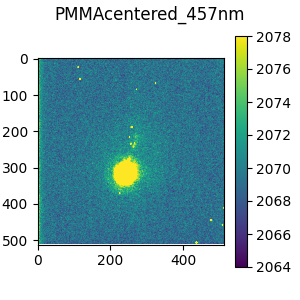

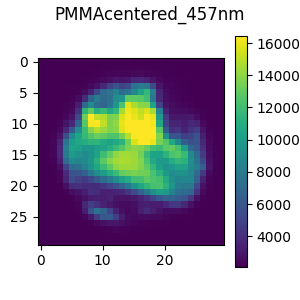

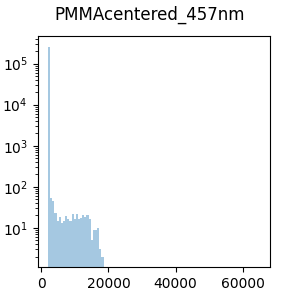

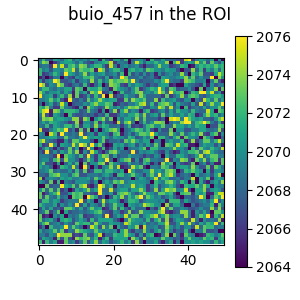

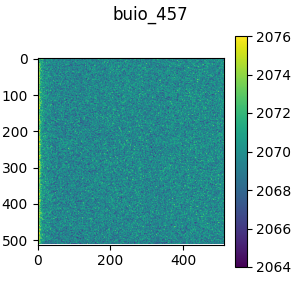

In [90]:
rTest=25
imArray=images_library.openImage(inputFile)
images_library.plotImage(imArray, title=title)

x, y = np.ogrid [:len(imArray[0]) , :len(imArray[1])]
ROI=images_library.defineROI(x, y, cenX, cenY, rTest)
images_library.plotImage(images_library.applySquareROI(imArray, cenX, cenY, r=15), title=title)

vmin, vmax= 2000, 65000
bins=np.linspace(vmin-0.5, vmax+0.5, 100 )
images_library.histImage(imArray, bins=bins, title =title)

print("%s" % title )
images_library.checkSaturation(imArray, saturation=2**16-10)
print("Center: %d, %d\n\n" % (cenX, cenY))


darkFiles = glob.glob(darkPath)
darkDict={}
keyDark=images_library.fillDict(darkDict, darkFiles, darkWord, "dati")[0]
images_library.plotImage(images_library.applySquareROI(darkDict[keyDark], cenX, cenY, rTest), title='%s in the ROI' %keyDark)
images_library.plotImage(darkDict[keyDark], title ='%s' %keyDark)

cerenkovFiles = glob.glob(dataPath)
cerDictFiles={}
keys=images_library.fillDict(cerDictFiles, cerenkovFiles, dataWord, "buio")

print("Dark and data dict filled!")

In [91]:
"""
cerDiff = images_library.diffImDark(cerDictFiles, darkDict[keyDark[0]])
lightIntegral=[]
nOfPixels=[]
for im in cerDiff: 
    #images_library.plotImage(images_library.applySquareROI(im, cenX, cenY, r=35))    
    vmin, vmax= 0, 65000
    bins=np.linspace(vmin-0.5, vmax+0.5, 100 )
    #images_library.histImage(eventROI, bins=bins)
    x, y = np.ogrid [:len(imArray[0]) , :len(imArray[1])]

    ROI=images_library.defineROI(x, y, cenX, cenY, r=5)
    lightIntegral.append(np.sum(im[ROI]))    
    nOfPixels.append(len(np.argwhere(ROI==True)))
    
print("N of pixels with more events than background: ", nOfPixels)
print("Light integral in the ROI: ", lightIntegral)
mean = np.array(lightIntegral)/np.array(nOfPixels)
print("Mean light in the ROI: ", mean)

lightMean = np.mean(mean)
lightStdev = np.std(mean)
#print('Mean: %d, Stdev: %d' % (lightMean, lightStdev))

"""

'\ncerDiff = images_library.diffImDark(cerDictFiles, darkDict[keyDark[0]])\nlightIntegral=[]\nnOfPixels=[]\nfor im in cerDiff: \n    #images_library.plotImage(images_library.applySquareROI(im, cenX, cenY, r=35))    \n    vmin, vmax= 0, 65000\n    bins=np.linspace(vmin-0.5, vmax+0.5, 100 )\n    #images_library.histImage(eventROI, bins=bins)\n    x, y = np.ogrid [:len(imArray[0]) , :len(imArray[1])]\n\n    ROI=images_library.defineROI(x, y, cenX, cenY, r=5)\n    lightIntegral.append(np.sum(im[ROI]))    \n    nOfPixels.append(len(np.argwhere(ROI==True)))\n    \nprint("N of pixels with more events than background: ", nOfPixels)\nprint("Light integral in the ROI: ", lightIntegral)\nmean = np.array(lightIntegral)/np.array(nOfPixels)\nprint("Mean light in the ROI: ", mean)\n\nlightMean = np.mean(mean)\nlightStdev = np.std(mean)\n#print(\'Mean: %d, Stdev: %d\' % (lightMean, lightStdev))\n\n'

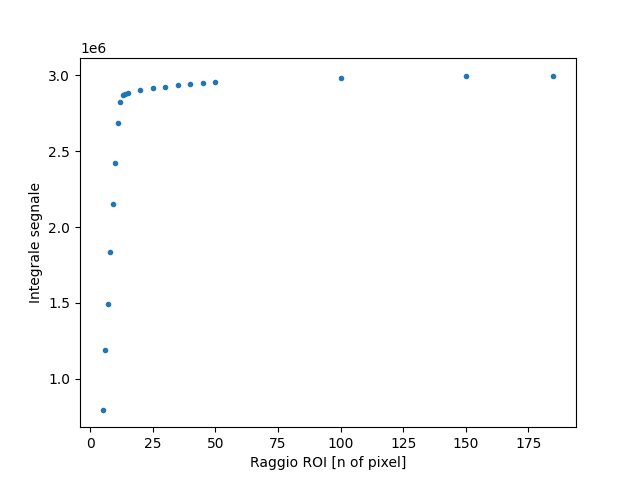

In [92]:
#Guardo le variazioni del risultato in funzione della dimensione della ROI
cerDiff = images_library.diffImDark(cerDictFiles, darkDict[keyDark])

lightIntegralErr = []
lightIntegral=[]
radii = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 150, 185]


for r in radii:
    l = []
    for im in cerDiff: 
        l.append(np.sum(im[images_library.defineROI(x, y, cenX, cenY, r)]))
    lightIntegral.append(np.mean(l))
    lightIntegralErr.append(np.std(l))
    
fig, ax = plt.subplots(1,1)
ax.errorbar(radii, lightIntegral, yerr=lightIntegralErr, fmt='.')
ax.set_xlabel("Raggio ROI [n of pixel]")
ax.set_ylabel("Integrale segnale")

data = [np.array(radii), np.array(lightIntegral, dtype=np.int32), np.array(lightIntegralErr, dtype=np.int32)]
fmt = "%d, %d, %d"
outputFile = "notes/txt/"+title+'.txt'
np.savetxt(outputFile, np.transpose(data), fmt = fmt)